# Bank-loan-engagement

In [154]:
# objective:  Probability to default model for a bank loan engagement.

# linear algebra
import numpy as np 

# data processing
import pandas as p 

# data visualization
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier

# reading data:

import pandas as pd
Good_bad = pd.read_csv("https://raw.githubusercontent.com/Kash48/Bank-loan-engagement-Logistic/master/good_bad.csv")
Good_bad.shape

(1000, 21)

In [155]:
Good_bad.head()

,Check_Account_Status,Duration,CreditHistory,Purpose,Amount,SavingsAcc,EmployTenure,Rate,Status,Debtors,...,Propert,Age,Plans,Hous,ExCredit,Job,NumLiab,Tel,Foreign,Good/Bad
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


#### Data Exploration/Analysis

In [156]:
#checking missing values:
Good_bad.info()   
#no missing values were found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Check_Account_Status    1000 non-null object
Duration                1000 non-null int64
CreditHistory           1000 non-null object
Purpose                 1000 non-null object
Amount                  1000 non-null int64
SavingsAcc              1000 non-null object
EmployTenure            1000 non-null object
Rate                    1000 non-null int64
Status                  1000 non-null object
Debtors                 1000 non-null object
CurrResidTenure         1000 non-null int64
Propert                 1000 non-null object
Age                     1000 non-null int64
Plans                   1000 non-null object
Hous                    1000 non-null object
ExCredit                1000 non-null int64
Job                     1000 non-null object
NumLiab                 1000 non-null int64
Tel                     1000 non-null object
Foreign                 1000 non-null object
G

In [157]:
#Let's take a more detailed look at what data is actually missing:

total=Good_bad.isnull().sum().sort_values(ascending=False)

#total numbers of missing values in data sorted by highest to lowest order
#print(total)

percent_1 = Good_bad.isnull().sum()/Good_bad.count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)    
# order of desc percentage of missing rate(round off to 1 decimal)

missing_data = p.concat([total, percent_2], axis=1, keys=['Total', '%'])

#print("percent_1",percent_1)
#print("percent_2",percent_2)
print(missing_data)

                      Total    %
Good/Bad                  0  0.0
Debtors                   0  0.0
Duration                  0  0.0
CreditHistory             0  0.0
Purpose                   0  0.0
Amount                    0  0.0
SavingsAcc                0  0.0
EmployTenure              0  0.0
Rate                      0  0.0
Status                    0  0.0
CurrResidTenure           0  0.0
Foreign                   0  0.0
Propert                   0  0.0
Age                       0  0.0
Plans                     0  0.0
Hous                      0  0.0
ExCredit                  0  0.0
Job                       0  0.0
NumLiab                   0  0.0
Tel                       0  0.0
Check_Account_Status      0  0.0


In [158]:
# create dummies for categorical variables:

dummies=pd.get_dummies(Good_bad['CreditHistory']).rename(columns=lambda x: 'CreditHistory_' + str(x))
# bring the dummies back into the original dataset
Good_bad = pd.concat([Good_bad, dummies], axis=1)

#Good_bad.head()

Good_bad['Purpose'].value_counts()

dummies2=pd.get_dummies(Good_bad['Purpose']).rename(columns=lambda x:'Purpose_' + str(x))
# bring the dummies back into the original dataset
Good_bad = pd.concat([Good_bad, dummies2], axis=1)
Good_bad.head()

dummies3 = pd.get_dummies(Good_bad['Check_Account_Status']).rename(columns=lambda x: 'Check_Account_Status_' + str(x))
# bring the dummies back into the original dataset
Good_bad = pd.concat([Good_bad, dummies3], axis=1)


dummies4 = pd.get_dummies(Good_bad['SavingsAcc']).rename(columns=lambda x: 'SavingsAcc_' + str(x))
# bring the dummies back into the original dataset
Good_bad = pd.concat([Good_bad, dummies4], axis=1)


dummies5 = pd.get_dummies(Good_bad['EmployTenure']).rename(columns=lambda x: 'EmployTenure_' + str(x))
# bring the dummies back into the original dataset
Good_bad = pd.concat([Good_bad, dummies5], axis=1)



dummies6 = pd.get_dummies(Good_bad['Status']).rename(columns=lambda x: 'Status_' + str(x))
# bring the dummies back into the original dataset
Good_bad = pd.concat([Good_bad, dummies6], axis=1)



dummies7 = pd.get_dummies(Good_bad['Debtors']).rename(columns=lambda x: 'Debtors_' + str(x))
# bring the dummies back into the original dataset
Good_bad = pd.concat([Good_bad, dummies7], axis=1)



dummies8 = pd.get_dummies(Good_bad['Propert']).rename(columns=lambda x: 'Propert_' + str(x))
# bring the dummies back into the original dataset
Good_bad = pd.concat([Good_bad, dummies8], axis=1)



dummies9 = pd.get_dummies(Good_bad['Plans']).rename(columns=lambda x: 'Plans_' + str(x))
# bring the dummies back into the original dataset
Good_bad = pd.concat([Good_bad, dummies9], axis=1)



dummies10 = pd.get_dummies(Good_bad['Hous']).rename(columns=lambda x: 'Hous_' + str(x))
# bring the dummies back into the original dataset
Good_bad = pd.concat([Good_bad, dummies10], axis=1)




dummies11 = pd.get_dummies(Good_bad['Job']).rename(columns=lambda x: 'Job_' + str(x))
# bring the dummies back into the original dataset
Good_bad = pd.concat([Good_bad, dummies11], axis=1)



dummies12 = pd.get_dummies(Good_bad['Tel']).rename(columns=lambda x: 'Tel_' + str(x))
# bring the dummies back into the original dataset
Good_bad = pd.concat([Good_bad, dummies12], axis=1)



dummies13 = pd.get_dummies(Good_bad['Foreign']).rename(columns=lambda x: 'Foreign_' + str(x))
# bring the dummies back into the original dataset
Good_bad = pd.concat([Good_bad, dummies13], axis=1)

In [159]:
Good_bad.head()

,Check_Account_Status,Duration,CreditHistory,Purpose,Amount,SavingsAcc,EmployTenure,Rate,Status,Debtors,...,Hous_A152,Hous_A153,Job_A171,Job_A172,Job_A173,Job_A174,Tel_A191,Tel_A192,Foreign_A201,Foreign_A202
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,1,0,0,0,1,0,0,1,1,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,1,0,0,0,1,0,1,0,1,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,1,0,0,1,0,0,1,0,1,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,0,1,0,0,1,0,1,0,1,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,0,1,0,0,1,0,1,0,1,0


In [160]:

Good_bad.rename(columns={'Good/Bad': 'Good_Bad'}, inplace=True)

Good_bad.dtypes

Check_Account_Status    object
Duration                 int64
CreditHistory           object
Purpose                 object
Amount                   int64
SavingsAcc              object
EmployTenure            object
Rate                     int64
Status                  object
Debtors                 object
CurrResidTenure          int64
Propert                 object
Age                      int64
Plans                   object
Hous                    object
ExCredit                 int64
Job                     object
NumLiab                  int64
Tel                     object
Foreign                 object
Good_Bad                 int64
CreditHistory_A30        uint8
CreditHistory_A31        uint8
CreditHistory_A32        uint8
CreditHistory_A33        uint8
CreditHistory_A34        uint8
Purpose_A40              uint8
Purpose_A41              uint8
Purpose_A410             uint8
Purpose_A42              uint8
                         ...  
EmployTenure_A71         uint8
EmployTe

In [161]:
# drop columns that are not required- categorical + dummies(dummy variable trap ones+ lower frequency ones)

### dropping specific var ####
Good_bad.drop(['Check_Account_Status','CreditHistory','Purpose','SavingsAcc','EmployTenure','Status','Debtors','Propert','Plans','Hous','Job','Tel','Foreign'],axis=1,inplace=True) 

In [162]:
#checking frequencies and dropping variables:
 
Good_bad.apply(lambda x: x.value_counts()).T.stack()

Duration      4       6.0
              5       1.0
              6      75.0
              7       5.0
              8       7.0
              9      49.0
              10     28.0
              11      9.0
              12    179.0
              13      4.0
              14      4.0
              15     64.0
              16      2.0
              18    113.0
              20      8.0
              21     30.0
              22      2.0
              24    184.0
              26      1.0
              27     13.0
              28      3.0
              30     40.0
              33      3.0
              36     83.0
              39      5.0
              40      1.0
              42     11.0
              45      5.0
              47      1.0
              48     48.0
                    ...  
Propert_A124  0     846.0
              1     154.0
Plans_A141    0     861.0
              1     139.0
Plans_A142    0     953.0
              1      47.0
Plans_A143    0     186.0
            

In [163]:
Good_bad['Foreign_A202'].value_counts()  #drop
Good_bad['Plans_A142'].value_counts()   #drop
Good_bad['Job_A171'].value_counts() #drop 
Good_bad['Tel_A192'].value_counts() #drop
Good_bad['Hous_A153'].value_counts() #drop 
Good_bad['Job_A171'].value_counts() #drop 
Good_bad['Propert_A124'].value_counts() #drop
Good_bad['Status_A91'].value_counts() #drop
Good_bad['Debtors_A102'].value_counts() #drop
Good_bad['EmployTenure_A71'].value_counts() #drop
Good_bad['SavingsAcc_A64'].value_counts() #drop
Good_bad['Check_Account_Status_A13'].value_counts() #drop
Good_bad['CreditHistory_A30'].value_counts() #drop
Good_bad['Purpose_A48'].value_counts() #drop

0    991
1      9
Name: Purpose_A48, dtype: int64

In [164]:
Good_bad.drop(['Purpose_A44','Propert_A124','Status_A91','Debtors_A102','EmployTenure_A71','SavingsAcc_A64','Check_Account_Status_A13','CreditHistory_A30'],axis=1,inplace=True)

In [165]:
### model run #######


import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import sklearn

In [166]:
#update dependent variable
Good_bad['Good_Bad'] = Good_bad['Good_Bad'].apply(lambda x: 1 if x == 2 else 0)

Good_bad['Good_Bad'].value_counts()

0    700
1    300
Name: Good_Bad, dtype: int64

In [167]:
#picking up all column names 
Good_Bad2=Good_bad[:]

Good_Bad2.drop(['Good_Bad'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [168]:
Good_Bad2.head()

,Duration,Amount,Rate,CurrResidTenure,Age,ExCredit,NumLiab,CreditHistory_A31,CreditHistory_A32,CreditHistory_A33,...,Hous_A152,Hous_A153,Job_A171,Job_A172,Job_A173,Job_A174,Tel_A191,Tel_A192,Foreign_A201,Foreign_A202
0,6,1169,4,4,67,2,1,0,0,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,0,1,0,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,0,1,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,0,0,1,...,0,1,0,0,1,0,1,0,1,0


In [169]:
Good_bad.head()

,Duration,Amount,Rate,CurrResidTenure,Age,ExCredit,NumLiab,Good_Bad,CreditHistory_A31,CreditHistory_A32,...,Hous_A152,Hous_A153,Job_A171,Job_A172,Job_A173,Job_A174,Tel_A191,Tel_A192,Foreign_A201,Foreign_A202
0,6,1169,4,4,67,2,1,0,0,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,1,0,1,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,0,0,1,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,0,0,...,0,1,0,0,1,0,1,0,1,0


In [170]:
y = Good_bad.Good_Bad
y

0      0
1      1
2      0
3      0
4      1
5      0
6      0
7      0
8      0
9      1
10     1
11     1
12     0
13     1
14     0
15     1
16     0
17     0
18     1
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     1
      ..
970    0
971    0
972    1
973    1
974    0
975    0
976    0
977    0
978    1
979    1
980    1
981    1
982    0
983    1
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    1
999    0
Name: Good_Bad, Length: 1000, dtype: int64

In [171]:
y.unique().sum()

1

In [172]:
#split dataset in features and target variable

X = Good_Bad2
y = Good_bad.Good_Bad # Target variable

In [173]:
y.unique().sum()

1

In [174]:
# split X and y into training and testing sets
from sklearn.model_selection  import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
y_train.value_counts()

0    487
1    213
Name: Good_Bad, dtype: int64

In [175]:
X_train.shape

(700, 53)

In [176]:
y_train.shape

(700,)

In [177]:
from sklearn.model_selection  import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [184]:
#finding probabilies of being a defaulter
probs = logreg.predict_proba(X_test)  


#Keep Probabilities of the positive class only.
probs = probs[:, 1]  

probs=pd.DataFrame(probs)

probs.columns = ['p_d']

y_pred = probs['p_d'].apply(lambda x: 1 if x > 0.40 else 0)
y_pred.head()

0    0
1    0
2    0
3    0
4    1
Name: p_d, dtype: int64

In [186]:
# confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[178,  35],
       [ 41,  46]], dtype=int64)

In [188]:
#Compute the AUC Score.
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, probs)  
print('AUC: %.2f' % auc)  

AUC: 0.78


In [190]:
#Get the ROC Curve.
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs) 

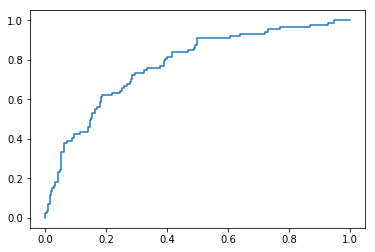

In [192]:
#Plot ROC Curve using our defined function
plt.plot(fpr, tpr)  


In [194]:
# precision accuracy recall
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7466666666666667
Precision: 0.5679012345679012
Recall: 0.5287356321839081
